In [210]:
import numpy as np
import scipy
import GPy
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
%matplotlib inline

In [211]:
#10 synthetic patients, random ALS-FRS (4-40), known alignment (8 readings / 6mnths)
date_rng = pd.date_range(start='1/1/2020', end='7/1/2020', periods=8)

df = pd.DataFrame(date_rng, columns=['date'])

#Patients 0-4 have increasing 
for synthetic_patient in range(5): 
    patient_id = "patient" + str(synthetic_patient)
    #df[patient_id] = np.random.randint(low=4,high=20,size=(len(date_rng)))
    df[patient_id] = np.linspace(start=4,stop=20,num=8)

#Pateints 5-9 have decreasing
for synthetic_patient in range(5, 10):
    patient_id = "patient" + str(synthetic_patient)
    #df[patient_id] = np.random.randint(low=20, high=40,size=(len(date_rng)))
    df[patient_id] = np.linspace(start=20,stop=4,num=8)

df

,date,patient0,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9
0,2020-01-01,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000,20.000000,20.000000,20.000000,20.000000
1,2020-01-27,6.285714,6.285714,6.285714,6.285714,6.285714,17.714286,17.714286,17.714286,17.714286,17.714286
2,2020-02-22,8.571429,8.571429,8.571429,8.571429,8.571429,15.428571,15.428571,15.428571,15.428571,15.428571
3,2020-03-19,10.857143,10.857143,10.857143,10.857143,10.857143,13.142857,13.142857,13.142857,13.142857,13.142857
4,2020-04-14,13.142857,13.142857,13.142857,13.142857,13.142857,10.857143,10.857143,10.857143,10.857143,10.857143
5,2020-05-10,15.428571,15.428571,15.428571,15.428571,15.428571,8.571429,8.571429,8.571429,8.571429,8.571429
6,2020-06-05,17.714286,17.714286,17.714286,17.714286,17.714286,6.285714,6.285714,6.285714,6.285714,6.285714
7,2020-07-01,20.000000,20.000000,20.000000,20.000000,20.000000,4.000000,4.000000,4.000000,4.000000,4.000000


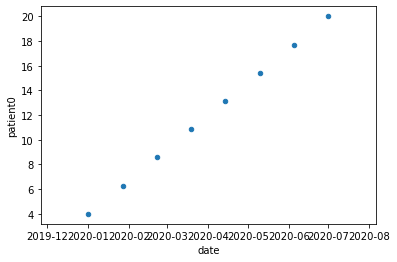

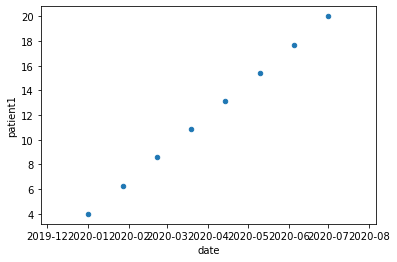

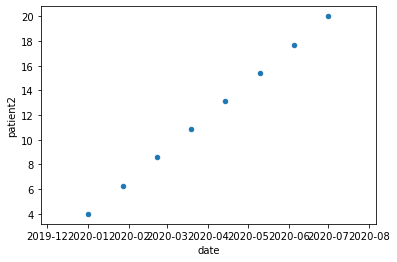

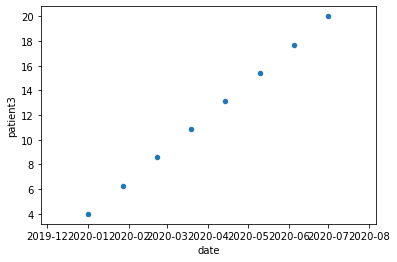

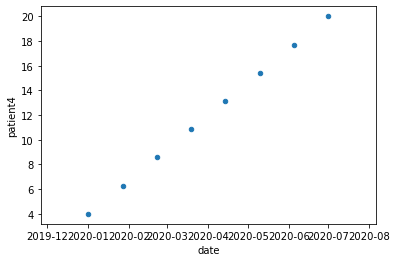

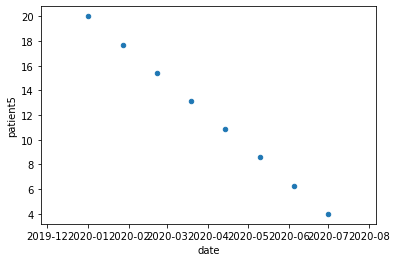

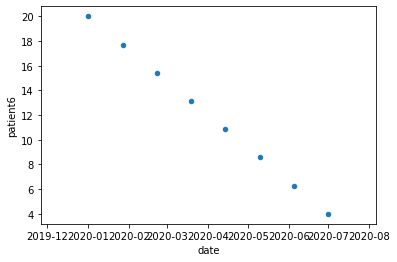

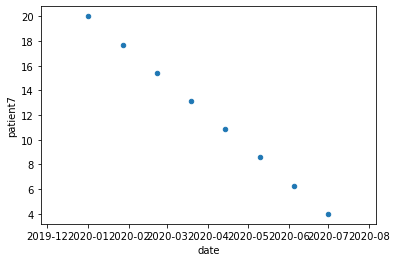

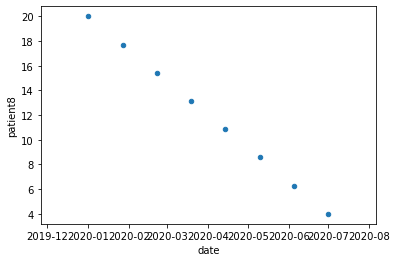

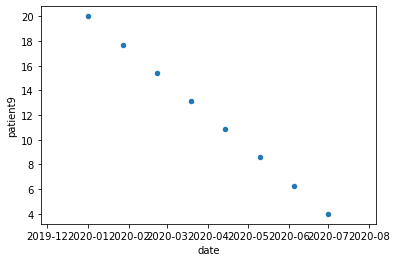

In [212]:
#ALS-FRS graph for each patient over time
for synthetic_patient in df.columns[1:]:
    df.plot(kind="scatter", x="date", y=synthetic_patient)

In [213]:
#Gaussian Process Regression on synthetic data, RBF kernel

k = GPy.kern.RBF(1)
k

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,1.0,+ve,


In [214]:
def datetimeToFloat(dt):
    return (dt - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')

In [215]:
#GPR model for patient0
X = df["date"].to_numpy().reshape((8,1))
Y = df["patient0"].to_numpy().reshape((8,1))

X = datetimeToFloat(X)
print(X)

m = GPy.models.GPRegression(X, Y, k)
m.optimize()

m
#TODO: log likelihood

[[1.5778368e+09]
 [1.5800832e+09]
 [1.5823296e+09]
 [1.5845760e+09]
 [1.5868224e+09]
 [1.5890688e+09]
 [1.5913152e+09]
 [1.5935616e+09]]


GP_regression.,value,constraints,priors
rbf.variance,85.70776241962676,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,85.70776241962687,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x1d9ef8f8>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1d93a700>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1d93a0a0>]}

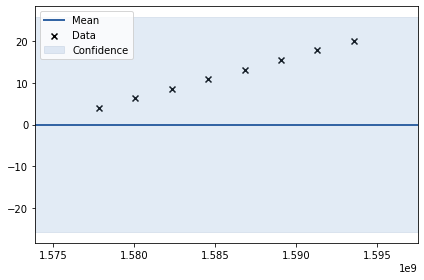

In [216]:
m.plot()

In [217]:
X
#Convert to numbers

array([[1.5778368e+09],
       [1.5800832e+09],
       [1.5823296e+09],
       [1.5845760e+09],
       [1.5868224e+09],
       [1.5890688e+09],
       [1.5913152e+09],
       [1.5935616e+09]])

In [218]:
Y

array([[ 4.        ],
       [ 6.28571429],
       [ 8.57142857],
       [10.85714286],
       [13.14285714],
       [15.42857143],
       [17.71428571],
       [20.        ]])